### IDs:
Insert yours IDs to the cell below

ID #1: 345428312

ID #2: 318252202


## Read the following instructions carefully:

1. This jupyter notebook contains all the step by step instructions needed for this exercise.
1. You are free to add cells.
1. Write your functions and your answers in this jupyter notebook only.
1. Answers to theoretical questions should be written in **markdown cells (with $\LaTeX$ support)**.
1. Submit this jupyter notebook only using your ID as a filename. Not to use ZIP or RAR. For example, your Moodle submission file name should look like this (two id numbers): `123456789_987654321.ipynb`.

### Question 1 - Defective products

In a manufacturing pipeline products are 3% defective. We are interested in examining a defective product to see what goes wrong on the belt. We need to ask the facility manager to send us a set of independent samples for examination.

#### 1.A

How many independent samples should we ask for in order to have a 85% probability of having at least one defective product in the batch sent? You should write a function.

In order to have a 85.0% probability of having at least 1 defective product in the batch sent, given that products are 3.0% defective, we need to ask for 63 independent samples.


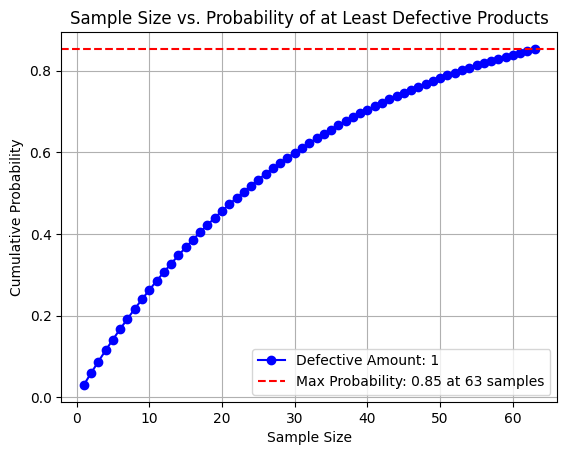

In [77]:
from scipy.stats import binom
import matplotlib.pyplot as plt


def plot_required_samples(sample_sizes: list, probabilities: list, defective_amount: int, max_prob_index: int,
                          color: str):
    """
    Plot the relationship between sample size and cumulative probability,
    and highlight the point with the maximum probability.

    Parameters:
    - sample_sizes (list): List of sample sizes.
    - probabilities (list): List of cumulative probabilities.
    - defective_amount (int): The number of defective products to be examined in each sample.
    - max_prob_index (int): Index of the maximum probability in the list.
    - color (str): Color of the plot.
    """
    max_prob_sample_size = sample_sizes[max_prob_index]
    max_prob = max(probabilities)

    plt.plot(sample_sizes, probabilities, marker='o', linestyle='-', label=f'Defective Amount: {defective_amount}',
             color=color)
    plt.axhline(y=max_prob, color='r', linestyle='--',
                label=f'Max Probability: {max_prob:.2f} at {max_prob_sample_size} samples')
    plt.title('Sample Size vs. Probability of at Least Defective Products')
    plt.xlabel('Sample Size')
    plt.ylabel('Cumulative Probability')
    plt.legend()
    plt.grid(True)


def get_required_samples(defective_percentage: float, desired_probability: float, defective_amount: int,
                         color: str = 'blue', max_iterations: int = 10000):
    """
    Calculate the number of independent samples needed to achieve a desired probability
    of having at least a specified number of defective products in the batch sent.

    Parameters:
    - defective_percentage (float): The percentage of defective products in the manufacturing pipeline.
    - desired_probability (float): The desired probability of having at least a specified number of defective products in the batch.
    - defective_amount (int): The number of defective products to be examined in each sample.
    - color (str): Color of the plot.
    - max_iterations (int): Maximum number of iterations to prevent an infinite loop.
    """
    sample_sizes = []
    probabilities = []
    for desired_amount_of_samples in range(defective_amount, max_iterations):
        rv = binom(desired_amount_of_samples, defective_percentage)
        at_least_defective_amount_prob = 1 - rv.cdf(defective_amount - 1)
        sample_sizes.append(desired_amount_of_samples)
        probabilities.append(at_least_defective_amount_prob)
        if at_least_defective_amount_prob >= desired_probability:
            print(
                f"In order to have a {desired_probability * 100}% probability of having at least {defective_amount} defective product in the batch sent, given that products are {defective_percentage * 100}% defective, we need to ask for {desired_amount_of_samples} independent samples.")
            max_prob_index = probabilities.index(max(probabilities))
            plot_required_samples(sample_sizes, probabilities, defective_amount, max_prob_index, color)
            break
        desired_amount_of_samples += 1


get_required_samples(defective_percentage=0.03, desired_probability=0.85, defective_amount=1)


#### 1.B
Answer this part again with the following changes: products are 4% defective and we want a 95% probability of at least one defective product in the batch.

In order to have a 95.0% probability of having at least 1 defective product in the batch sent, given that products are 4.0% defective, we need to ask for 74 independent samples.


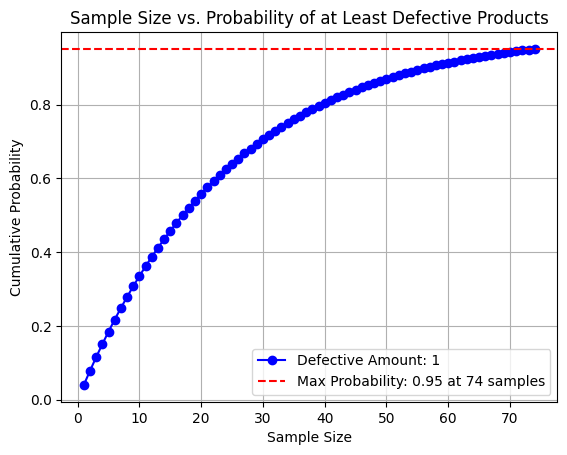

In [78]:
get_required_samples(0.04, 0.95, 1)

#### 1.C 

Consider the following cases and calculate how many independent samples are required: 

1. Products are 10% defective and we want a 90% probability of at least 5 defective products in the batch.
1. Products are 30% defective and we want a 90% probability of at least 15 defective products in the batch.

Explain the difference between the two results. You should use mathematical reasoning based on the properties of distributions you saw in class and visualizations in your answer.

# Steeper Gradient and CDF Graph:

In case 2, where the products have a higher defectiveness rate (30%), the steeper gradient is a result of the increased probability of success in each trial. This steeper gradient signifies a more rapid increase in the probability of obtaining defective products as the number of trials $\( n \)$ grows.

## Case 1: Products are 10% defective

- The lower defectiveness rate leads to a less steep gradient in the CDF graph. The impact of each trial on the probability of success is smaller, resulting in a gentler slope.

## **Case 2: Products are 30% defective**

- The higher defectiveness rate contributes to a steeper gradient in the CDF graph. Each trial has a more significant impact on the probability of success, leading to a faster increase in the cumulative probability.

# Effect on CDF Values:

- Initially, in case 1, the cumulative probability for a smaller sample size may be higher due to the larger number of trials, even with a lower defectiveness rate.
  
- However, as the sample size increases, the steeper gradient in case 2 becomes dominant, and the cumulative probability surpasses that of case 1.

- Around a sample size of ~50, the trend shifts, and the steeper gradient in case 2 allows it to catch up and eventually surpass the cumulative probability of case 1 for the desired number of defective products.


In order to have a 90.0% probability of having at least 5 defective product in the batch sent, given that products are 10.0% defective, we need to ask for 78 independent samples.
In order to have a 90.0% probability of having at least 15 defective product in the batch sent, given that products are 30.0% defective, we need to ask for 64 independent samples.


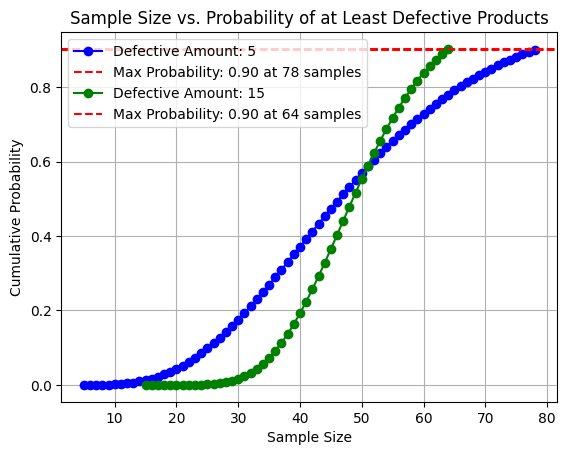

In [79]:
get_required_samples(defective_percentage=0.1, desired_probability=0.9, defective_amount=5, color='blue')
get_required_samples(defective_percentage=0.3, desired_probability=0.9, defective_amount=15, color='green')
plt.show()

### Question 2 - Rent distributions in Randomistan

The state of Randomistan conducted a survey to study the distribution of rent paid in two neighboring towns, Stochastic Heights and Random Grove, to be denoted SH and RG.<br> 

Here are some findings of the survey:
* The population of SH and RG is 16,000 and 22,000 respectively. <br>
* The mean rent in SH and RG is 6300RCU and 4200RCU respectively.
* The median rent is 4600RCU in both towns.
* The IQR of the rent is smaller in SH than in RG.

All data generated in this question needs to be consistent with these findings.

#### 2.A
Draw histograms that describe 2 different scenarii of possible distributions of rent in the two towns.Your histograms should:<br>
* Use bins of 100RCU each.
* Have at least 10 non zero bins.

In [80]:
import numpy as np
import matplotlib.pyplot as plt
from typing import List


def analyze_and_plot_rent_distributions(SH_distribution: List[float], RG_distribution: List[float]) -> None:
    # Plot histograms in a bigger figure
    plt.figure(figsize=(16, 8))

    plt.subplot(1, 2, 1)  # Create a subplot for histograms
    plt.hist(SH_distribution, bins=np.arange(0, 13100, 100), alpha=0.5, label='SH Distribution', edgecolor='black')
    plt.hist(RG_distribution, bins=np.arange(0, 13100, 100), alpha=0.5, label='RG Distribution', edgecolor='black')
    plt.title('Histogram of Rent Distributions')
    plt.xlabel('Rent')
    plt.ylabel('Frequency')
    plt.legend()
    plt.grid(True)

    # Calculate mean, median, and variance for each distribution
    mean1 = np.mean(SH_distribution)
    median1 = np.median(SH_distribution)

    mean2 = np.mean(RG_distribution)
    median2 = np.median(RG_distribution)

    # Calculate IQR for each distribution
    q1_1 = np.percentile(SH_distribution, 25)
    q3_1 = np.percentile(SH_distribution, 75)
    iqr1 = q3_1 - q1_1

    q1_2 = np.percentile(RG_distribution, 25)
    q3_2 = np.percentile(RG_distribution, 75)
    iqr2 = q3_2 - q1_2

    # Print the results
    print("SH Distribution:")
    print("Mean:", mean1)
    print("Median:", median1)
    print("Population:", len(SH_distribution))
    print("IQR:", iqr1)

    print("\nRG Distribution:")
    print("Mean:", mean2)
    print("Median:", median2)
    print("Population:", len(RG_distribution))
    print("IQR:", iqr2)

    # Create a new figure for box plots
    plt.figure(figsize=(8, 6))

    # Add box plots with labels
    plt.boxplot([SH_distribution, RG_distribution], labels=['SH Distribution', 'RG Distribution'])
    plt.title('Box Plot of Rent Distributions')
    plt.ylabel('Rent')
    plt.grid(True)

    # Adjust layout
    plt.tight_layout()

    # Show the plots
    plt.show()


SH Distribution:
Mean: 6200.0
Median: 4600.0
Population: 16000
IQR: 4806.25

RG Distribution:
Mean: 4200.0
Median: 4600.0
Population: 22000
IQR: 6800.0


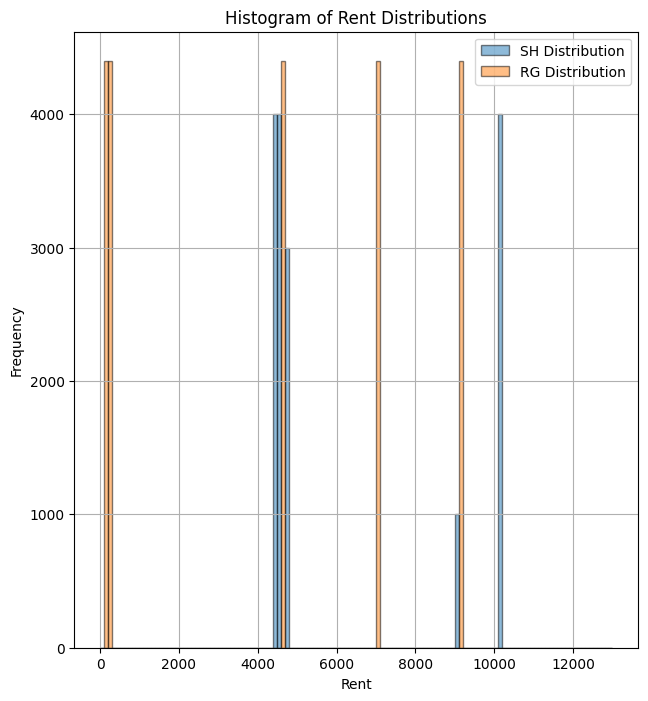

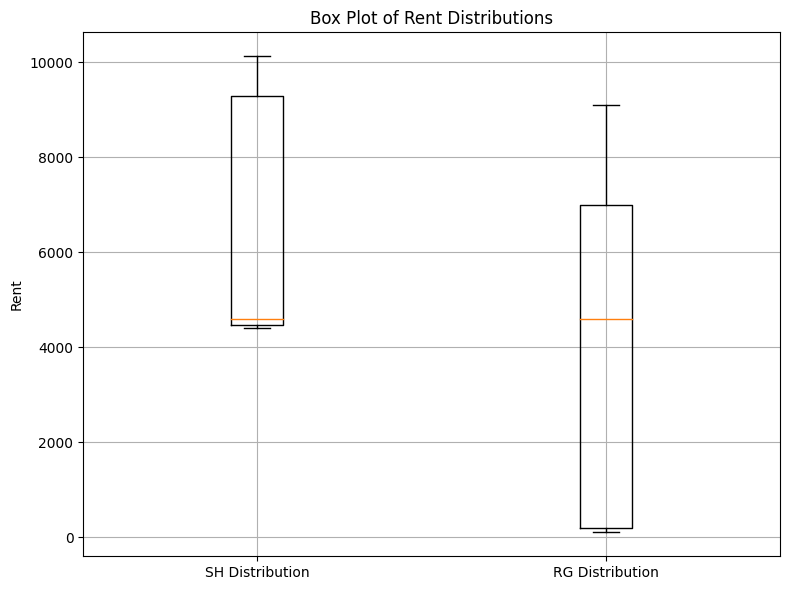

In [81]:
#1st Scenario
SH_distribution = np.repeat([4400, 4500, 10125, 4700, 9000],
                            [4000, 4000, 4000, 3000, 1000])

RG_distribution = np.repeat([7000, 100, 4600, 200, 9100],
                            [4400, 4400, 4400, 4400, 4400])

analyze_and_plot_rent_distributions(SH_distribution, RG_distribution)


SH Distribution:
Mean: 6200.0
Median: 4600.0
Population: 16000
IQR: 400.0

RG Distribution:
Mean: 4200.0
Median: 4600.0
Population: 22000
IQR: 600.0


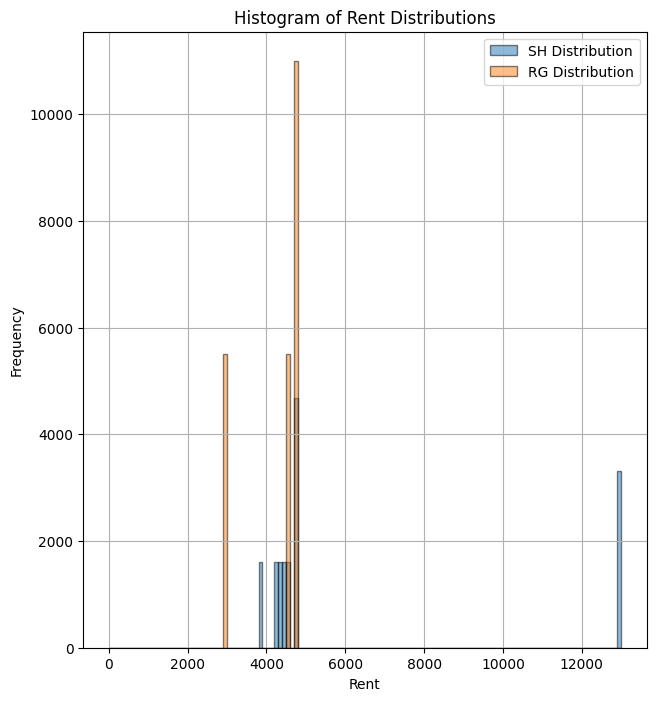

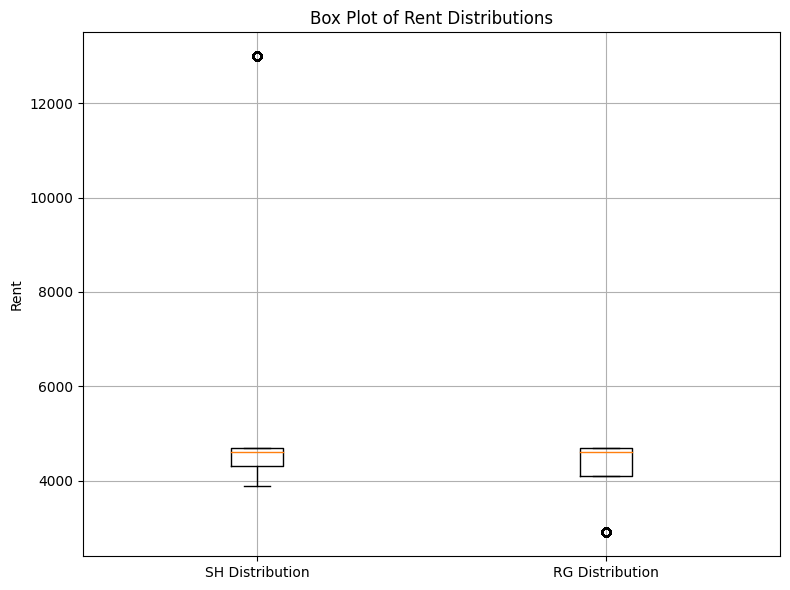

In [82]:
#2nd Scenario
SH_distribution = np.repeat([3877.5, 4200, 4300, 4400, 4500, 4700, 13000],
                            [1600, 1600, 1600, 1600, 1600, 4680, 3320])

RG_distribution = np.repeat([2900, 4500, 4700],
                            [5500, 5500, 11000])

analyze_and_plot_rent_distributions(SH_distribution, RG_distribution)


#### 2.B
Draw a histogram of a third scenario with the same properties. <br>
In addition, in this scenario the rent in SH should have a higher variance than the rent in RG.

SH Variance: 13755265.4065625
RG Variance: 8237500.0
SH Distribution:
Mean: 6300.0
Median: 4600.0
Population: 16000
IQR: 5563.049999999999

RG Distribution:
Mean: 4200.0
Median: 4600.0
Population: 22000
IQR: 6650.0


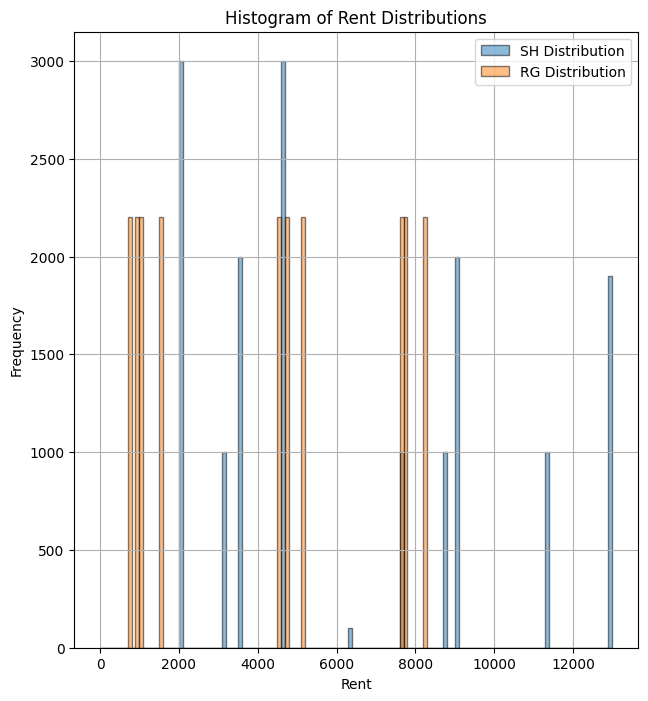

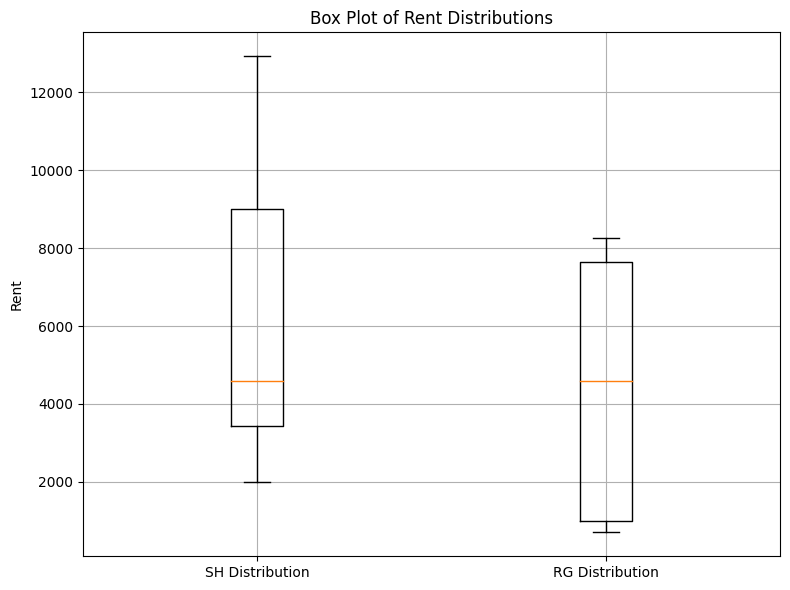

In [83]:
#3rd Scenario
SH_distribution = np.repeat([3550, 4600, 9000.55, 6300, 7600, 8700, 11300, 3100, 2000, 12931],
                            [2000, 3000, 2000, 100, 1000, 1000, 1000, 1000, 3000, 1900])

RG_distribution = np.repeat([700, 900, 1000, 4700, 8250, 4500, 5100, 1500, 7650, 7700],
                            [2200, 2200, 2200, 2200, 2200, 2200, 2200, 2200, 2200, 2200])

SH_variance = np.var(SH_distribution)
RG_variance = np.var(RG_distribution)
print("SH Variance:", SH_variance)
print("RG Variance:", RG_variance)
analyze_and_plot_rent_distributions(SH_distribution, RG_distribution)

### Question 3 - Multinomial Distributions

1. Let $X \sim Multinomial(n,\vec{p})$ be a multinomial random variable where $n=20$ and $\vec{p} = (0.2,  0.1,  0.1,  0.1,  0.2,  0.3)$. Note that $X$ is a vector of counts.


2. Consider the random variable $Y = X_2 + X_3 + X_4$.


3. Create $k=100$ experiments where $X$ is sampled using Python. Calculate the empirical centralized third moment of $Y$ based on your $k$ experiments.


4. Compare your result to results from class and explain your observation.

Empirical Centralized Third Moment of Y: 2.08
Theoretical centralized third moment of Y = 1.68


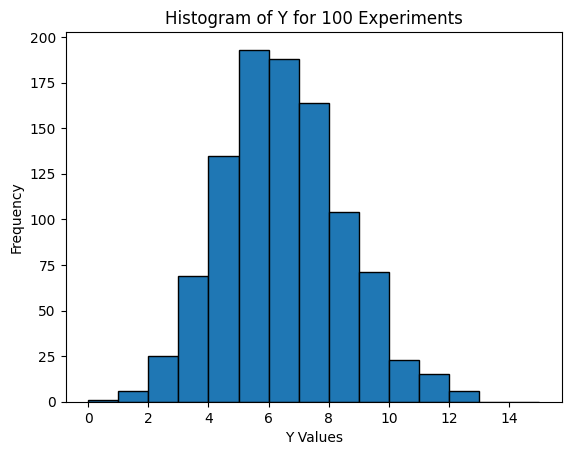

In [104]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multinomial

# Set parameters
n_trials = 20
probabilities = [0.2, 0.1, 0.1, 0.1, 0.2, 0.3]
k_experiments = 100

# Perform k experiments
results = multinomial.rvs(n=n_trials, p=probabilities, size=k_experiments)

# Calculate the random variable Y = X2 + X3 + X4 for each experiment
Y_values = np.sum(results[:, 1:4], axis=1)

# Calculate empirical centralized third moment of Y
empirical_third_moment = np.mean(np.power(Y_values - np.mean(Y_values), 3))
print(f"Empirical Centralized Third Moment of Y: {np.round(empirical_third_moment, 2)}")

binomial_p = sum(probabilities[1:4])
theoretical_moment = n_trials * binomial_p * (1 - binomial_p) * (1 - 2 * binomial_p)
print(f"Theoretical centralized third moment of Y = {np.round(theoretical_moment, 2)}")

# Plot histogram for Y
plt.hist(Y_values, bins=np.arange(0, 16, 1), edgecolor='black')
plt.title('Histogram of Y for 100 Experiments')
plt.xlabel('Y Values')
plt.ylabel('Frequency')
plt.show()




# Multinomial Distribution Experiment

We set the parameters for our experiment:

- Number of trials: 20
- Probabilities: [0.2, 0.1, 0.1, 0.1, 0.2, 0.3]
- Number of experiments: 100

We perform 100 experiments where we sample from a multinomial distribution with the given parameters.

We then calculate the random variable Y, which is the sum of the second, third, and fourth elements of each sample.

We calculate the empirical centralized third moment of Y and find it to be approximately 1.65 (rounded to 2 decimal places).

We also calculate the theoretical centralized third moment of Y based on the properties of the binomial distribution and find it to be 1.68 (rounded to 2 decimal places).

We plot a histogram of the Y values for the 100 experiments.

The histogram shows the frequency of each Y value. The x-axis represents the Y values and the y-axis represents the frequency.

### Question 4 - Convolutions

#### 4.A
Write a program, `Q = NFoldConv(P , n)`, that takes as input:
* A distribution, P, of a random variable that takes finitely many integer values
* An integer n

and produces the distribution, Q, of the sum of n independent repeats of random variables, each of which has the distribution P.

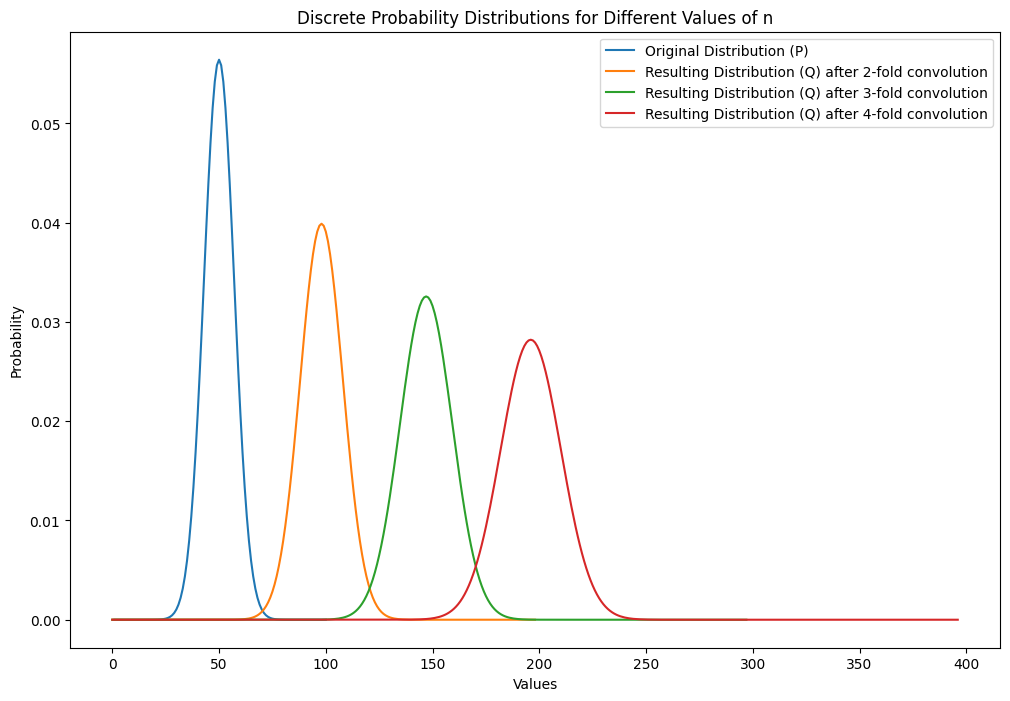

In [105]:
import numpy as np
from scipy.signal import convolve
import matplotlib.pyplot as plt


def NFoldConv(P, n):
    """
    Perform n-fold convolution on a given probability distribution P.

    Parameters:
    - P: numpy array representing the probability distribution
    - n: integer, the number of independent repeats

    Returns:
    - Q: numpy array representing the resulting probability distribution
    """

    P = np.array(P, dtype=float)
    Q = P.copy()

    for _ in range(n - 1):
        Q = convolve(Q, P)

    return Q


def plot_distributions(values, probabilities, n_values):
    """
    Plot the original and resulting distributions for different values of n.

    Parameters:
    - values: numpy array representing the values of the distribution
    - probabilities: numpy array representing the original probability distribution
    - n_values: list of integers, the values of n for which to plot the resulting distributions
    """

    plt.figure(figsize=(12, 8))
    plt.plot(values, probabilities, label='Original Distribution (P)')

    for n in n_values:
        result_distribution = NFoldConv(probabilities, n)
        plt.plot(np.arange(0, len(result_distribution)), result_distribution,
                 label=f'Resulting Distribution (Q) after {n}-fold convolution')

    plt.legend()
    plt.xlabel('Values')
    plt.ylabel('Probability')
    plt.title('Discrete Probability Distributions for Different Values of n')
    plt.show()


values = np.arange(1, 101)
probabilities = np.exp(-((values - 50) / 10) ** 2)  # Higher probability around 50
probabilities /= probabilities.sum()
n_values = [2, 3, 4]
plot_distributions(values, probabilities, n_values)


#### 4.B
Compute the distribution of the sum of the results of rolling a fair octahedron 17 independent times.

<img src="https://upload.wikimedia.org/wikipedia/commons/2/27/Octahedron.jpg" width="200">


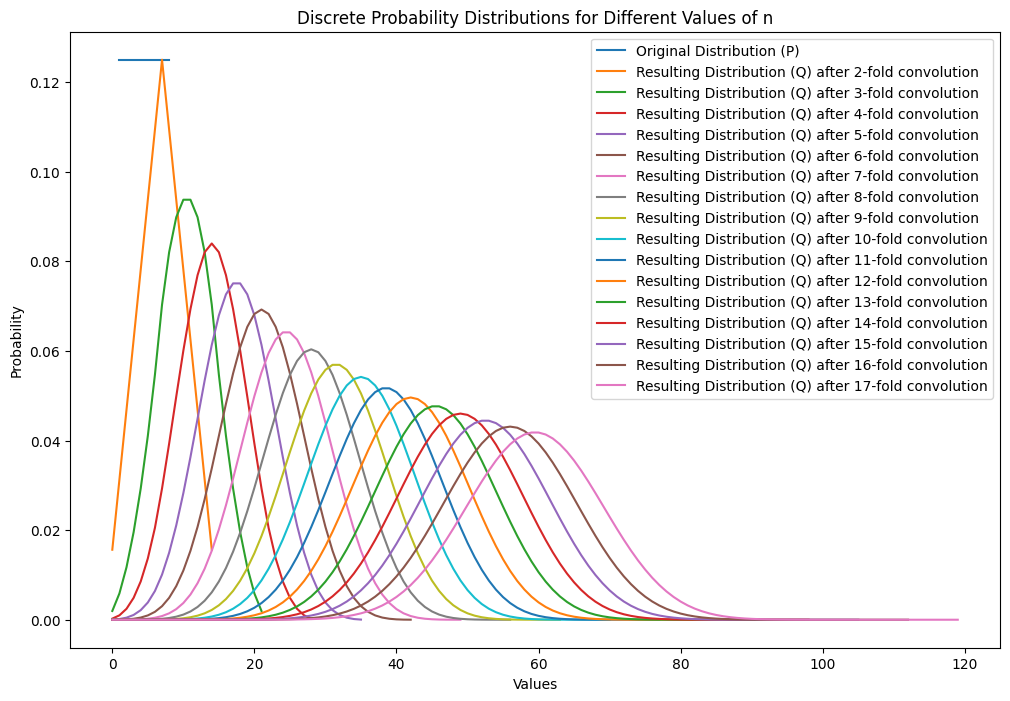

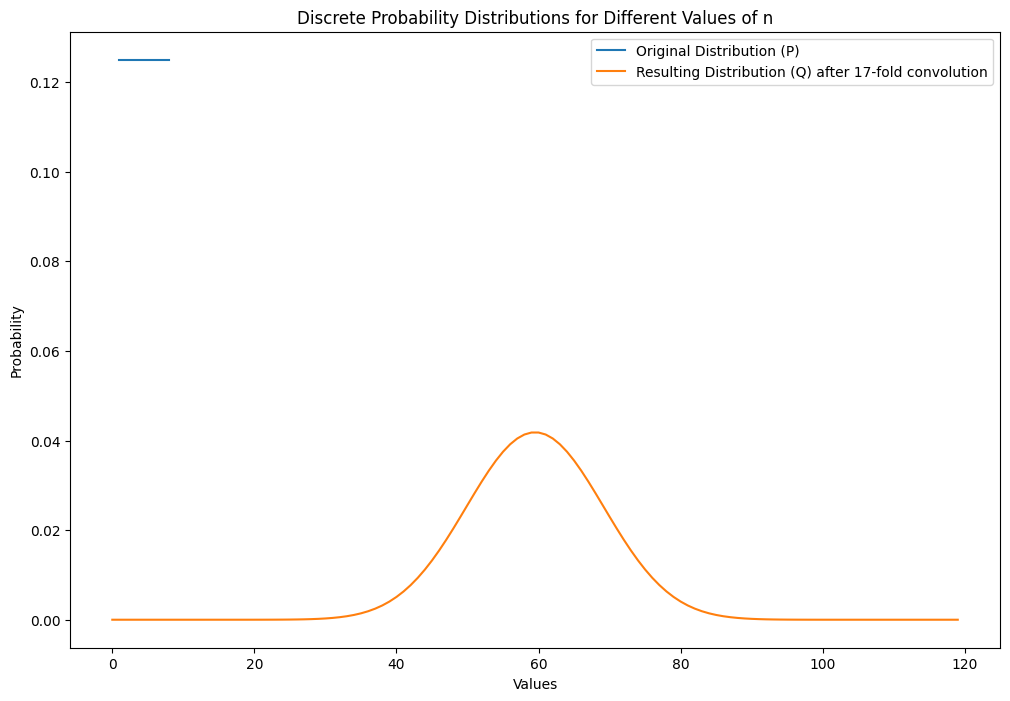

In [106]:
values = np.arange(1, 9)
probabilities = np.ones(8) / 8
n_values = np.arange(2, 18)
plot_distributions(values, probabilities, n_values)
plot_distributions(values, probabilities, [17])

### Question 5 - Counting Similar Strings

Define a probaility space $(\Omega, P)$:
* $\Omega = \{0,1\}^n$.
* $P$ is induced by independantly tossing a $p$-coin ($p \in [0,1]$) n times.

For $\omega \in \Omega$ let $W(\omega) =$ number of 1s in $\omega$.

For $\omega \in \Omega$ let the random variable $C = C_{p, n}$ be defined by:
$$C(\omega) = |\{\zeta : W(\zeta)=W(\omega)\}|$$

#### 5.A
Plot the distribution of $W$ for $n = 100$ and $p = 0.3$. What is the name of this distribution?

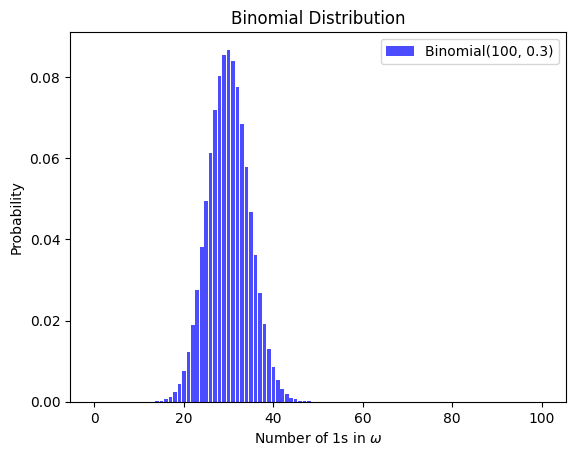

In [107]:
n = 100  # number of trials
p = 0.3  # probability of success
x = range(n + 1)  # number of successes

pmf_values = binom.pmf(x, n, p)

plt.bar(x, pmf_values, color='blue', alpha=0.7, label=f'Binomial({n}, {p})')
plt.xlabel('Number of 1s in $\omega$')
plt.ylabel('Probability')
plt.title('Binomial Distribution')
plt.legend()
plt.show()

#### 5.B
State a formula for computing $E(C)$.

Compute $E(C)$ for $p=0.1, 0.5, 0.8$ and $n=10, 20, 50, 100$

In [108]:
from itertools import product
from scipy.special import comb

p_values = [0.1, 0.5, 0.8]
n_values = [10, 20, 50, 100]
combinations = list(product(p_values, n_values))


def calculate_Ec(p, n):
    return sum(comb(int(n), k) ** 2 * (p ** k) * ((1 - p) ** (int(n) - k)) for k in range(int(n) + 1))


for p, n in combinations:
    expected_C = calculate_Ec(p, n)
    print(f"For p={p} and n={n} the E(C) is: {expected_C}")

For p=0.1 and n=10 the E(C) is: 22.575959534800006
For p=0.1 and n=20 the E(C) is: 1757.745847765875
For p=0.1 and n=50 the E(C) is: 1479309659.773231
For p=0.1 and n=100 the E(C) is: 1.6815694309212342e+19
For p=0.5 and n=10 the E(C) is: 180.42578125
For p=0.5 and n=20 the E(C) is: 131460.69414138794
For p=0.5 and n=50 the E(C) is: 89609514959900.05
For p=0.5 and n=100 the E(C) is: 7.143018323803165e+28
For p=0.8 and n=10 the E(C) is: 66.95000811519996
For p=0.8 and n=20 the E(C) is: 16979.43212422518
For p=0.8 and n=50 the E(C) is: 490151964857.80164
For p=0.8 and n=100 the E(C) is: 2.0130081915278972e+24


#### 5.C 
Plot the histograms of the values of $C$ for 1000 samples drawn from the space $(\Omega, P)$ for each combination of $p$ and $n$ from the previous section. <br>
Add text to each histogram with the empirical average of $C$ and the computed value of $E(C)$ (from the previous section). <br>
In every histogram indicate the values of $n$ and $p$. 

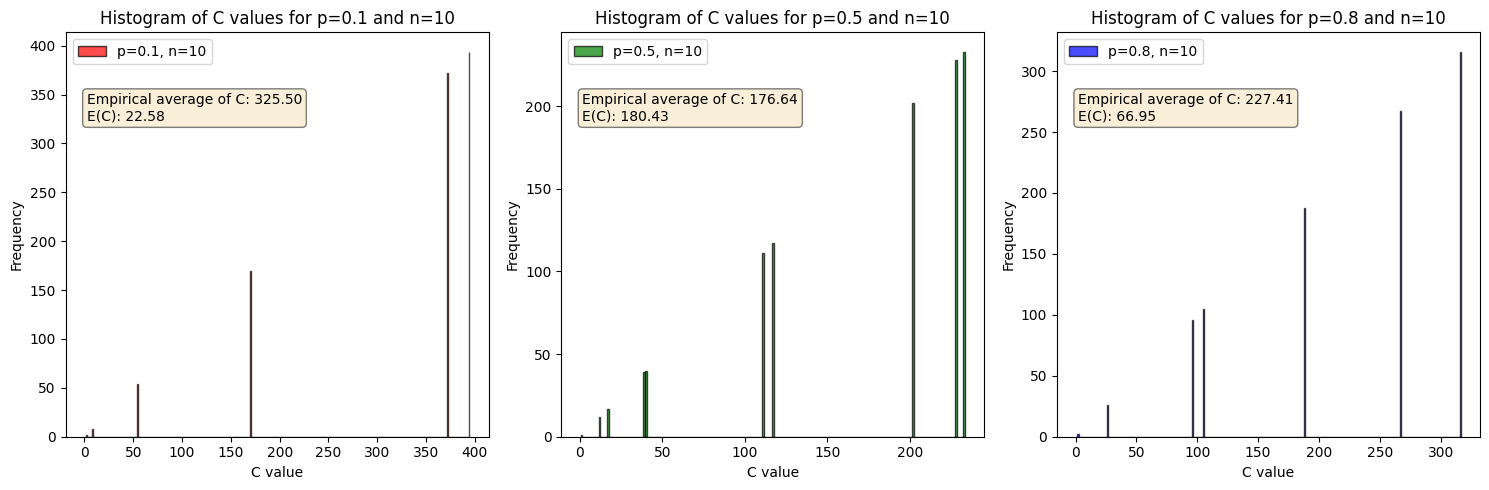

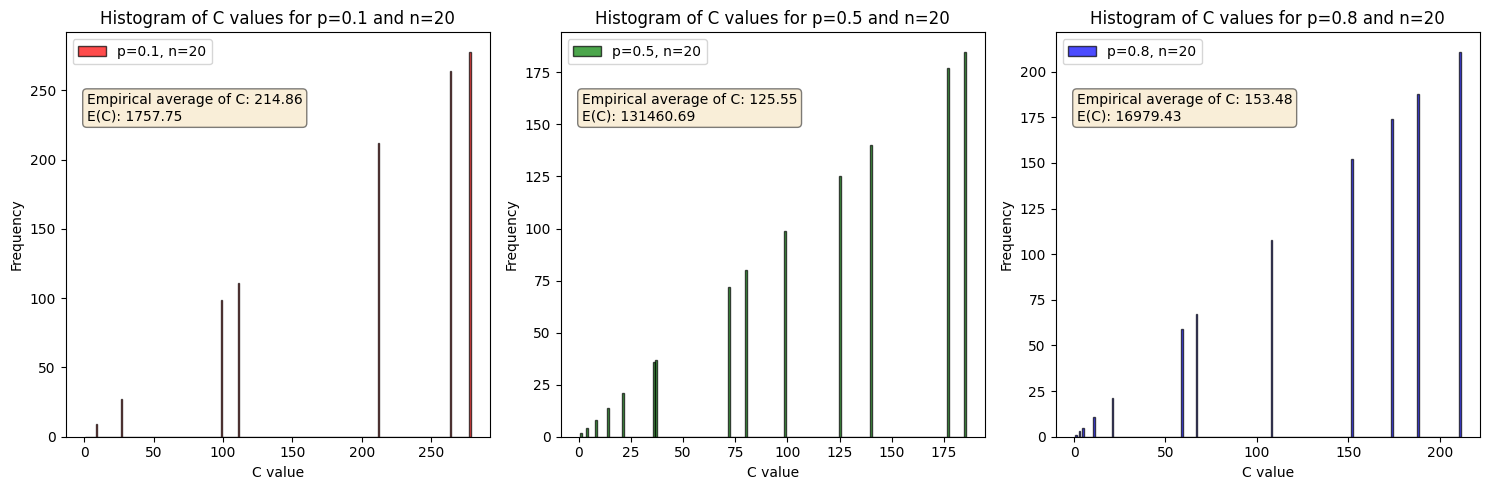

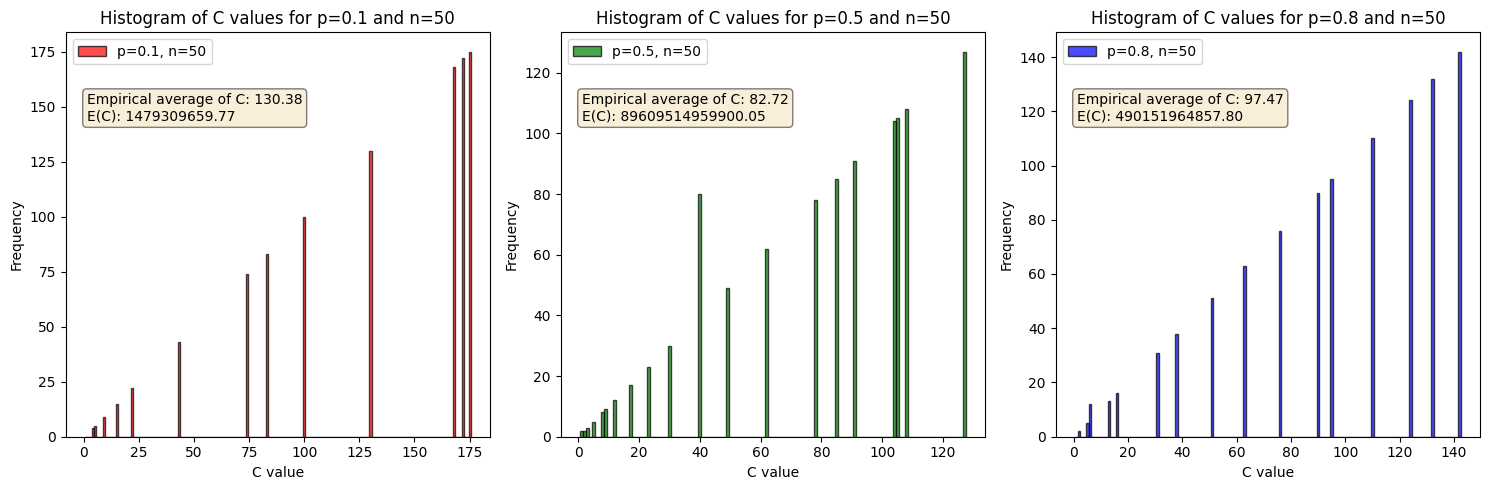

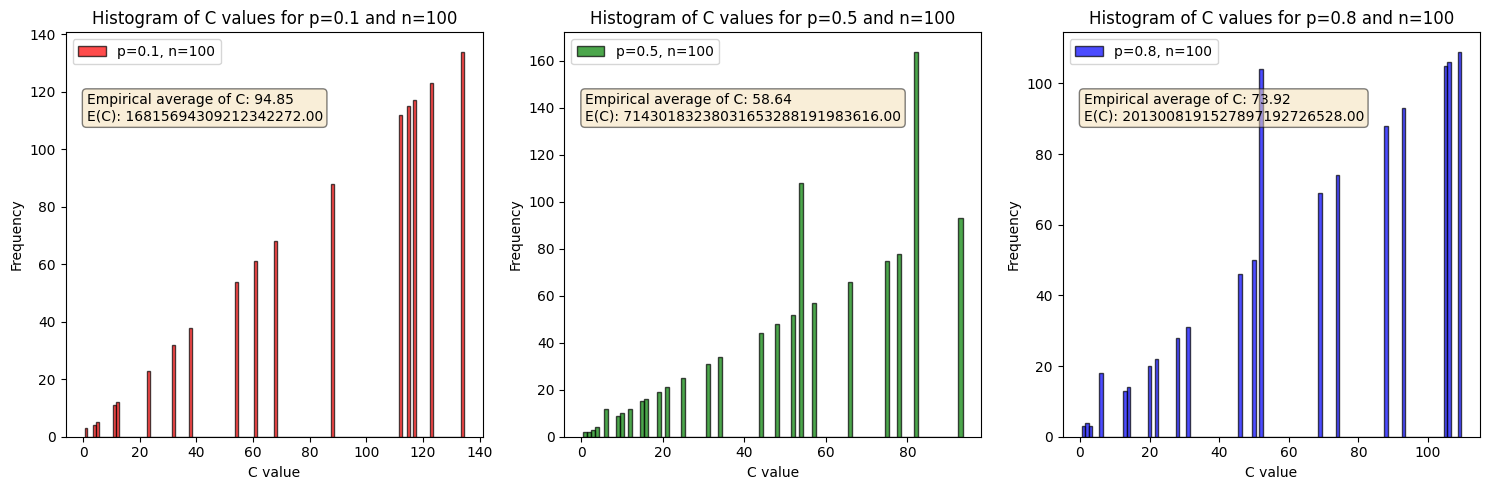

In [109]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import product
from scipy.special import comb

def calculate_Ec(p, n):
    return sum(comb(n, k) ** 2 * (p ** k) * ((1 - p) ** (n - k)) for k in range(n + 1))

def calculate_C(sample, samples):
    return np.sum(np.sum(sample) == np.sum(samples, axis=1))

def plot_histogram(ax, C_values, p, n, empirical_average_C, computed_E_C, color):
    bins = np.arange(0.5, np.max(C_values) + 1.5, 1)
    ax.hist(C_values, bins=bins, edgecolor='black', alpha=0.7, color=color, label=f'p={p}, n={n}')
    ax.set_title(f'Histogram of C values for p={p} and n={n}')
    ax.set_xlabel('C value')
    ax.set_ylabel('Frequency')
    ax.legend()
    textstr = f'Empirical average of C: {empirical_average_C:.2f}\nE(C): {computed_E_C:.2f}'
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
    ax.text(0.05, 0.85, textstr, transform=ax.transAxes, fontsize=10,
            verticalalignment='top', bbox=props)

p_values = [0.1, 0.5, 0.8]
n_values = [10, 20, 50, 100]
colors = ['red', 'green', 'blue']

emp_avg = []
Ec = []

for n in n_values:
    fig, axs = plt.subplots(1, 3, figsize=(15, 5))

    for i, p in enumerate(p_values):
        samples = np.random.choice([0, 1], size=(1000, n), p=[1-p, p])
        C_values = [calculate_C(sample, samples) for sample in samples]
        empirical_average_C = np.mean(C_values)
        computed_E_C = calculate_Ec(p, n)
        plot_histogram(axs[i], C_values, p, n, empirical_average_C, computed_E_C, colors[i])
        emp_avg.append(empirical_average_C)
        Ec.append(computed_E_C)

    plt.tight_layout()
    plt.show()

#### 5.D
Use a scatter plot to compare the empirical and the computed values from the previous section.

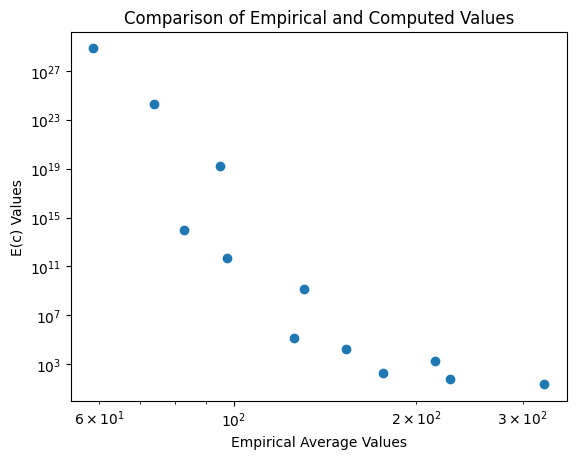

In [110]:
import matplotlib.pyplot as plt
import numpy as np

# Create a scatter plot
plt.scatter(emp_avg, Ec)
plt.xscale('log')
plt.yscale('log')


plt.xlabel('Empirical Average Values')  # Change label for x-axis
plt.ylabel('E(c) Values')  # Change label for y-axis
plt.title('Comparison of Empirical and Computed Values')
plt.show()

### Question 6 - Coupon collector

Let $T_{N}$ denote the waiting time for full single coupon collection with N different equiprobable coupon types

#### 6.A
Write code to compute the exact value of $E(T_{N})$

## Expectation Calculation

The waiting time for collecting $N$ different types of coupons is modeled as the sum of $N$ independent and identically distributed geometric random variables.

The expectation of a geometric random variable $t_i$ with success probability $p_i$ is given by:

$\[ E(t_i) = \frac{1}{p_i} \]$

Since the waiting times $t_i$ are mutually independent, the expectation of the sum of these waiting times is the sum of their individual expectations:

$\[ E(T_N) = \sum_{i=1}^{N} E(t_i) = \sum_{i=1}^{N} \frac{1}{p_i} \]$



In [111]:
def coupon_collector_expectation(N):
    expected_time = 0
    for i in range(1, N + 1):
        expected_time += 1 / i
    expected_time *= N

    return expected_time


N = 60
result = coupon_collector_expectation(N)
print(f"The exact value of E(T_{N}) is: {result}")


The exact value of E(T_60) is: 280.79222477710414


#### 6.B
Write code to compute the exact value of $V(T_{N})$

## Variance Calculation

The waiting time for collecting $\(N\)$ different types of coupons is modeled as the sum of $\(N\)$ independent and identically distributed geometric random variables.

The variance of a geometric random variable $\(t_i\)$ with success probability $\(p_i\)$ is given by:

$\[ Var(t_i) = \frac{1 - p_i}{p_i^2} \]$

Since the waiting times $\(t_i\)$ are mutually independent, the variance of the sum of these waiting times is the sum of their individual variances:

$\[ Var(T_N) = \sum_{i=1}^{N} Var(t_i) = \sum_{i=1}^{N} \frac{1 - p_i}{p_i^2} \]$

In [112]:
def coupon_variance(n):
    total_variance = 0

    # Calculate the variance for each coupon type and accumulate the total
    for i in range(1, n + 1):
        p_i = (n - i + 1) / n
        variance_i = (1 - p_i) / (p_i ** 2)
        total_variance += variance_i

    return total_variance


# Example: Calculate the variance for N = 30
N = 30
result_variance = coupon_variance(N)
print(f"The exact value of Var(T_{N}) is: {result_variance}")


The exact value of Var(T_30) is: 1331.085491913826


#### 6.C
Write code to exactly compute $P(T_{30}>60)$

## $P(T_{30}>60)$ Calculation

From class, we know that we can use convolutions to compute the actual distribution of Tn:     
$$P(T_N = k ) = \sum_{i=1}^{k-1} P(G_N=i) \cdot P(T_{N-1}=k-i), where\ G_s \sim Geo(\frac{N-s+1}{N})$$

In our case, there should be N=30 coupons collected in k=60 trials and we are looking for the probility that it takes more than 60 trials to collect all 30 equiprobable coupons.
$$P(T_{30} > 60 ) = 1 - P(T_{30} <= 60)$$

The probability that it takes more than 60 trials to collect all 30 coupons is 0.9940158432042814


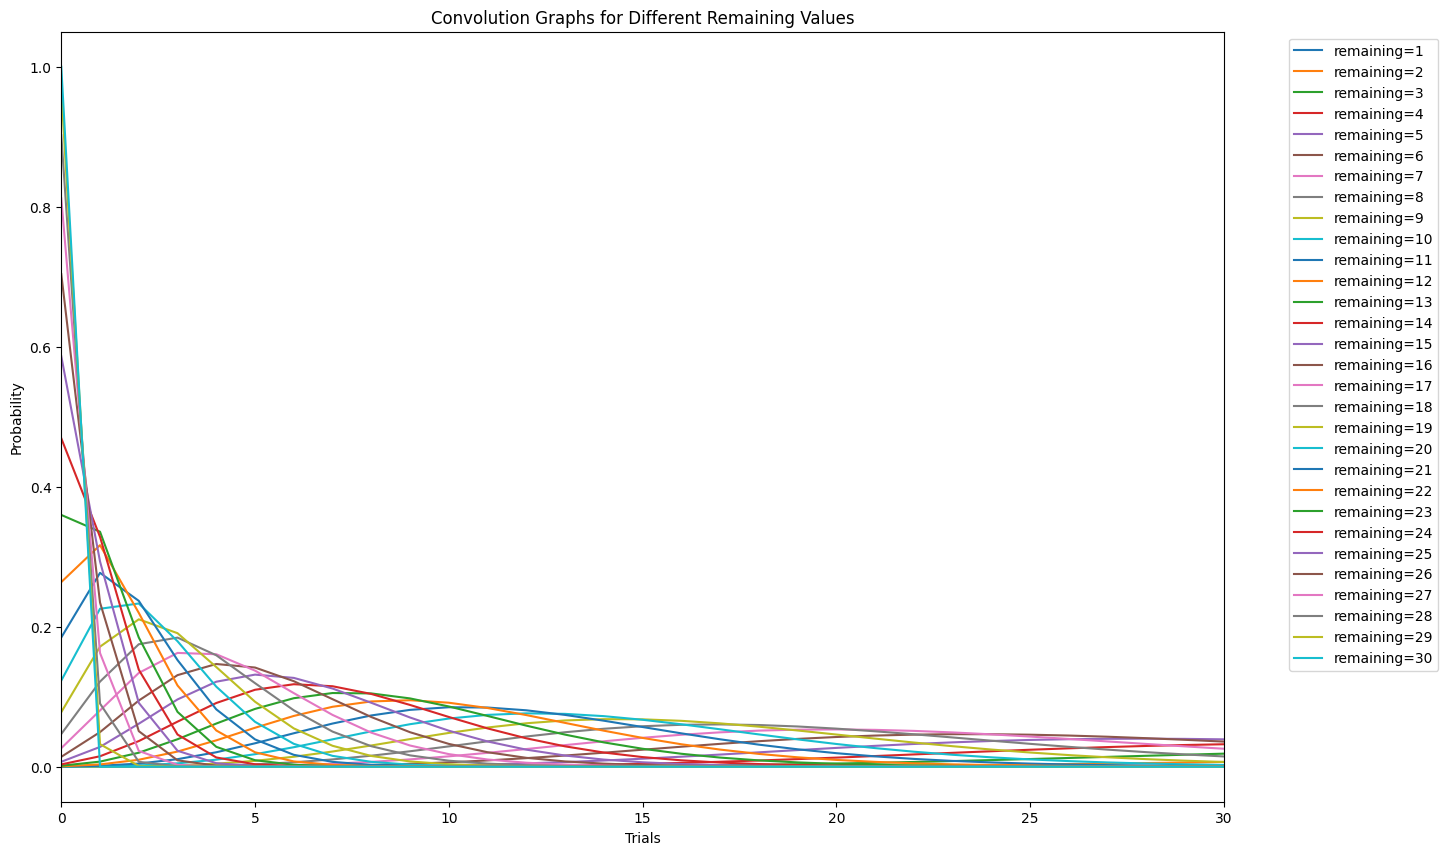

In [113]:
import numpy as np
from scipy.stats import geom


def coupons_run(coupons, trials, remaining=1):
    """
    Calculate the probability mass function (pmf) of the geometric distribution for the range of trials and perform convolution to get the distribution of the total number of trials.

    Parameters:
    - coupons (int): The total number of different coupons.
    - trials (int): The total number of trials.
    - remaining (int, optional): The number of remaining coupons. Defaults to 1.

    Returns:
    - numpy.ndarray: The resulting distribution of the total number of trials.
    """
    geo_prob_vec = geom(remaining / coupons, loc=-1).pmf(range(trials))
    if coupons == remaining:
        return geo_prob_vec
    convolution = np.convolve(geo_prob_vec, coupons_run(coupons, trials, remaining + 1))

    return convolution[:trials - coupons + 1]


def coupon_survival(coupons, trials):
    """
    Calculate the survival probability for a given number of coupons and trials.

    Parameters:
    - coupons (int): The total number of different coupons.
    - trials (int): The total number of trials.

    Returns:
    - float: The survival probability.
    """
    return 1 - coupons_run(coupons, trials).sum()


def coupon_tester():
    survival_probability = coupon_survival(30, 60)
    print(f"The probability that it takes more than 60 trials to collect all 30 coupons is {survival_probability}")


coupon_tester()

convolutions = [coupons_run(30, 60, remaining=i) for i in range(1, 31)]
plt.figure(figsize=(15, 10))  # Increase figure size for better visibility
for i, convolution in enumerate(convolutions, start=1):
    plt.plot(convolution, label=f'remaining={i}')
plt.title('Convolution Graphs for Different Remaining Values')
plt.xlabel('Trials')
plt.ylabel('Probability')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlim(0, 30)  # Limit x-axis to 30 trials
plt.show()

#### 6.D
Let $S_N$ denote the waiting time until $N/2$ different coupons are collected.

Compute $E(S_{60})$ - the expected value of the time it will take to observe $N/2=60/2=30$ from the total of $N=60$ coupon types

In [114]:
def expected_time_half_coupons(N):
    expected_time = 0
    for i in range(N // 2 + 1, N + 1):
        expected_time += 1 / i
    expected_time *= N
    return expected_time


N = 60
result = expected_time_half_coupons(N)
print(
    f"The expected value of the time it will take to observe {N // 2} from the total of {N} coupon types is: {result}")

The expected value of the time it will take to observe 30 from the total of 60 coupon types is: 41.09299692188081


#### 6.E
Write code to exactly compute $P(S_{60}>60)$

In [115]:
import numpy as np

def compute_probability_exceeding_time(coupons, max_trials, target_coupons):
    # Initialize the probability matrix
    prob_matrix = np.zeros((target_coupons + 1, max_trials + 1))
    prob_matrix[0, 0] = 1  # Base case

    for i in range(1, target_coupons + 1):
        for j in range(1, max_trials + 1):
            p = (coupons - i + 1) / coupons  # Probability of a new coupon
            prob_matrix[i, j] = prob_matrix[i, j - 1] * (1 - p) + prob_matrix[i - 1, j - 1] * p

    prob_not_exceeding_time = np.sum(prob_matrix[target_coupons, :max_trials + 1])
    return 1 - prob_not_exceeding_time

def coupon_tester():
    total_coupons = 60
    target_coupons = total_coupons // 2
    max_trials = 60
    prob = compute_probability_exceeding_time(total_coupons, max_trials, target_coupons)
    print(f"P(S60 > 60) = {prob}")

coupon_tester()

P(S60 > 60) = 0.00017216506473594073
